# RandomForest with GridSearch for best parameter. 

This notebook is divided into below 4 section:
1. Introduction
2. Data read, preparation and explore
3. RandomForest GridSearch
4. Model test on validation set
5. Result Submission


# 1. Introduction

This is the simplest demonstration of RandomForest model with best parameters identified with GridSearch. 

Initially, I provided all options for GridSearch, but it took more than 24+ to search and still not done. Impatiently, I killed it and started afresh with fever parameters to search and it completed in 4hours. 

I achieved 95% accuracy score which is not that great, but it can serve as a base approach which can be worked upon further to improve accuracy. 

I believe with all option of GridSearch, more accuracy could be achieved. But I simply didn't have patience to wait for it. Might be I will try it on AWS and it run for the time it need.  

Without wasting your time further, lets dive into it.


Kaggle competition link: https://www.kaggle.com/c/digit-recognizer/

### Import libraries

In [2]:
# Basic libraries
import numpy as np
import pandas as pd

# model libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# model accuracy check
from sklearn import metrics

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Data read, preparation and explore

### Read data files

In [3]:
# read the data
dir = '.\\digit-recognizer\\'
train_file = 'train.csv'
test_file = 'test.csv'

df_train = pd.read_csv(dir + train_file)
df_test = pd.read_csv(dir + test_file)


### Basic data check

In [4]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.shape

(42000, 785)

Each digit image is of 28x28 size which is total of 784 pixels. These pixel values are stored in columns pixel0....pixel785 (independent variable) for a digit. 
Column label contains the corresponding digit (dependent variable).

In [6]:
# columns pixel0....pixel785 are independent variable of a digit
# column label contains the digit (dependent variable)

df_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

Test data set contains 784 pixel values for a digit. It does not contain the label.

Need to indentify the digit based on the 784 pixels. 

In [7]:
df_test.shape

(28000, 784)

In [8]:
df_test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

### Explore Train Dataset

In [9]:
# no null values in train dataset

df_train.isnull().values.any()

False

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


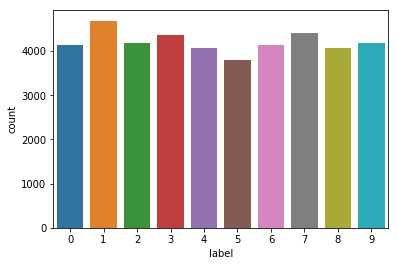

In [11]:
# print the frequency of each label

print(df_train['label'].value_counts())
sns.countplot(df_train['label'])

From train set, display few initial images and corresponding labels:

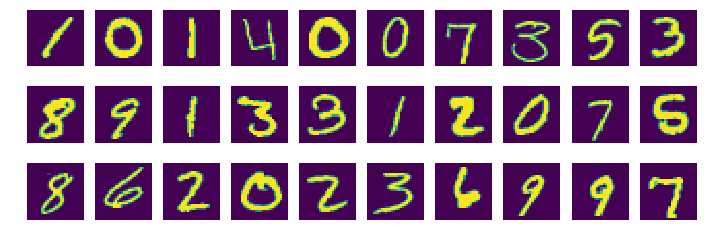

[1, 0, 1, 4, 0, 0, 7, 3, 5, 3]
[8, 9, 1, 3, 3, 1, 2, 0, 7, 5]
[8, 6, 2, 0, 2, 3, 6, 9, 9, 7]


In [12]:
plt.figure(figsize=(12,4))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(df_train.drop(['label'],axis=1).values[i].reshape(28,28) )
    plt.axis('off')
plt.show()

# print corresponding labels:
print(list(df_train['label'].loc[0:9]))
print(list(df_train['label'].loc[10:19]))
print(list(df_train['label'].loc[20:29]))

From test, display few initial images. Need to predict the lable for these. 

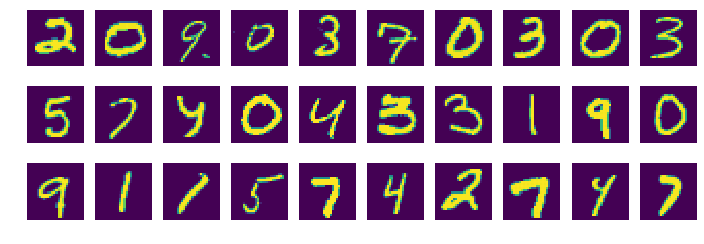

In [13]:
plt.figure(figsize=(12,4))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(df_test.values[i].reshape(28,28) )
    plt.axis('off')
plt.show()

# 3. RandomForest GridSearch

### Perform train-test split

Train data set is divided in 80:20 ratio for train/test


In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['label'],axis=1),
                                                   df_train['label'],
                                                   test_size = 0.2,
                                                   random_state=13)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


In [19]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
7956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y_train.head()

7956     5
24975    0
15389    9
34581    5
13928    5
Name: label, dtype: int64

### RandomForest Model

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set. Random forest model expects numeric values. 
Some advantages of using Random Forest are as follows:
1.	The same random forest algorithm or the random forest classifier can use for both classification and the regression task.
2.	Random forest classifier will handle the missing values.
3.	When we have more trees in the forest, random forest classifier won’t over fit the model. 



In first attempt, I ran with below set of parameter grid. GridSearch took 24+ hours and still running. I killed it in betwen and reduced paramter grid. 

- 'n_estimators': (np.arange(10,20)),
- 'criterion': ['gini', 'entropy'],
- 'max_features': ['auto', 'sqrt', 'log2', None]
- 'max_depth': (np.arange(20,40))


In second attempt, I removed max_festures parameters and reduced max_depth to (10,30). Search gott completed in 4hours

- 'max_depth': (np.arange(10,30))


For both the option, i used KFold of 10.

In [15]:
# build model RandomForest with best parameters

# Set the parameters by cross-validation
parameter_grid = {'n_estimators': (np.arange(10,20)),
                  'criterion': ['gini', 'entropy'],
                  'max_depth': (np.arange(10,30)) }

# use KFold
cross_validation = KFold(n_splits=10)

# define model search and fit
gs = GridSearchCV(RandomForestClassifier(), param_grid=parameter_grid, cv=cross_validation)
gs.fit(X_train, y_train)
print('Best score: {0}'.format(gs.best_score_))
print('Best parameters: {0}'.format(gs.best_params_))

# store best parameter model
m1 = gs.best_estimator_
print(m1)


Best score: 0.9523214285714285
Best parameters: {'criterion': 'entropy', 'max_depth': 18, 'n_estimators': 19}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=18, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


# 4. Model test on validation set (y_test)

In [26]:
# run preduction on X_test
# then check accuracy on y_test

y_pred = m1.predict(X_test)
y_pred

array([4, 3, 2, ..., 3, 7, 1], dtype=int64)

### Model accuracy

In [27]:
print('Accuracy score for y_test: ', metrics.accuracy_score(y_test,y_pred))

Accuracy score for y_test:  0.9530952380952381


Model built is 95.30% accurate. That means model is able to identify digit accuratly most of time. 

Let's see confusion matrix to check where model fails

In [28]:
pd.DataFrame(metrics.confusion_matrix(y_test,y_pred))

,0,1,2,3,4,5,6,7,8,9
0,810,0,1,1,0,1,4,0,8,0
1,0,910,2,3,1,1,3,4,0,1
2,5,3,768,4,3,2,5,10,5,3
3,4,2,17,813,1,11,1,6,7,4
4,3,3,2,0,781,2,9,0,6,17
5,6,1,6,14,3,756,8,1,7,4
6,5,3,1,0,6,7,799,1,2,0
7,0,4,13,2,5,1,0,844,3,15
8,1,1,6,7,10,8,5,2,779,11
9,3,2,7,13,13,4,1,7,10,746


### Combine both actual and predicted label for comparison

In [29]:
X_test['label'] = y_test
X_test['pred'] = y_pred

Total 394 prediction error in model

In [30]:
X_test_err = X_test[X_test['label'] != X_test['pred']]
X_test_err.shape

(394, 786)

Let's disply few images from error set

Label 9, Prediction 8


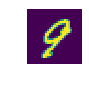

Label 4, Prediction 6


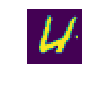

Label 5, Prediction 6


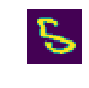

Label 3, Prediction 8


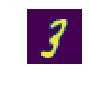

Label 3, Prediction 4


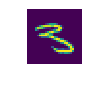

Label 7, Prediction 2


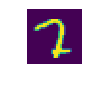

Label 4, Prediction 9


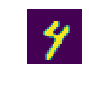

Label 7, Prediction 8


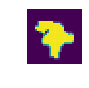

Label 8, Prediction 2


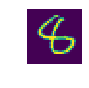

Label 4, Prediction 9


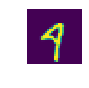

Label 9, Prediction 1


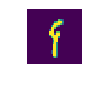

In [31]:
for i in range(11):  
    print('Label {0}, Prediction {1}'.format(X_test_err['label'].values[i],X_test_err['pred'].values[i]))
    plt.figure(figsize=(1,1))
    plt.imshow(X_test_err.drop(['label','pred'],axis=1).values[i].reshape(28,28) )
    plt.axis('off')
    plt.show()


Model is not doing a good job for images even with small distortion. Model has scope for further improvement

# 5. Final Submission

Finally, time to run model on required test set and sumbit the result on Kaggle

### Run on test data (df_test) and display few test images

In [33]:
pred = m1.predict(df_test)
pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

Display few images and their respective predicted labels

Prediction 2


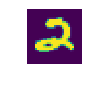

Prediction 0


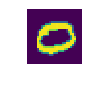

Prediction 9


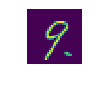

Prediction 4


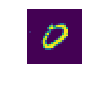

Prediction 3


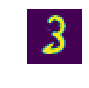

Prediction 7


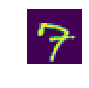

Prediction 0


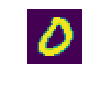

Prediction 3


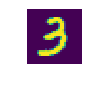

Prediction 0


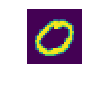

Prediction 3


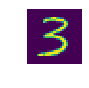

Prediction 5


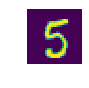

In [34]:

for i in range(11):  
    print('Prediction {0}'.format(pred[i]))
    plt.figure(figsize=(1,1))
    plt.imshow(df_test.values[i].reshape(28,28) )
    plt.axis('off')
    plt.show()


Seen above, 4th pic is of 0 but model predicted 4. Model needs further tuning. 

In [36]:
pred = pd.Series(pred,name="Label")

In [39]:
submit = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)

submit.to_csv("cnn_mnist_randomforest_gridsearch.csv",index=False)

Building models on personal computer has its own limitations. Like in this case, GridSearch with all parameter options, took 244+ hours and still not done. I plan to run GridSearch with all parameters option on AWS cloud solution and let it take time that it needs.

I end this notebook here with leaving further scope of improvement to GridSearch. Share your improvement ideas in comments. If you found this notebook helpful or you just liked it, some upvotes would be very much appreciated. It will keep me motivated :)

Thanks for visiting. 